In [12]:
#import all packages
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import math

In [2]:
#define the class for system
class System(object):
    '''
    This is the class containing all the bodies. 
    In our case, this would contain all the planets.
    We would also have a time step
    '''
    def __init__(self, bodies, tstep, scale = 3*(10**9)):
        self.bodies = bodies
        self.tstep = tstep
        self.scale = scale
        self.time = 0
        
    def update(self):
        """
        Updates all the bodies in the system by 1 timestep.
        The procedure happens in-place i.e., the position of bodies is updated
        and the function does not return anything.
        """
        newposlist = []
        self.time += self.tstep
        for body in self.bodies:
            newposlist.append(body.update(self))
        for i in range(len(newposlist)):
            self.bodies[i].set_pos(newposlist[i])
    
    def display(self):
        """
        Plot the current state of system. Also used to stitch together an animation.
        """
        for i in range(len(self.bodies)):
            plt.plot(self.bodies[i].pos[0], self.bodies[i].pos[1], 
                     marker = 'o', color = self.bodies[i].color, 
                     ms = self.bodies[i].size) 
            
            #plt.xlim(-9*(10**9), 3*self.scale)
            #plt.ylim(-3*self.scale, 3*self.scale)

            plt.xlabel('x direction')
            plt.ylabel('y direction')

        plt.title("System time = "+str(self.time))
        plt.show()

class Body(object):
    '''
    This is the class with which we can create the
    bodies in our system. Each instance of this class
    will be a body in the system.
    
    Attributes:
    color: Color of the body
    size: size of the body
    mass: mass of the body
    pos: Position of the body
    vel: velocity of the body
    acc: acceleration of the body
    '''
    
    G = 6.67*10**(-11)
    
    def __init__(self, color = 'black', size = 15, pos = (0, 0), vel = (0, 10), 
                 acc = (0, 0), mass = 1):
        self.color = color
        self.size = size
        self.mass = mass
        self.pos = pos
        self.vel = vel
        self.acc = acc
    
    def gforce_2bod(self, body2):
        """
        Calculate the gravitational force experienced by self from body2.
        Used to calculate the acceleration for update step
        """
        distsq = (self.pos[0]-body2.pos[0])**2 + (self.pos[1]-body2.pos[1])**2
        if distsq == 0:
            F = [0, 0]
        else: 
            Fmag = (G*self.mass*body2.mass)/distsq                      #magnitude of force
            F = [-Fmag*(self.pos[0]-body2.pos[0])/np.sqrt(distsq), 
                 -Fmag*(self.pos[1]-body2.pos[1])/np.sqrt(distsq)]      #negative is to accomodate direction
        return F
    
    def net_acc(self, system):
        """
        Calculate the net acceleration experienced by the body from all other bodies
        """
        Fnet = np.array([0., 0.])
        for body3 in system.bodies:
            Fnet += np.array(self.gforce_2bod(body3))
        net_acc = Fnet/self.mass
        return net_acc
    
    def update(self, system):
        """
        Calculate the new position of the body.
        Does not update the position to perform simultaneous update step calculations 
        for other bodies too.
        The function essentially executes a forward euler method for numerical approximation. 
        The smaller the choice of time step, better the accuracy.
        """
        self.acc = self.net_acc(system)
        t = system.tstep
        self.vel += t*self.acc
        new_pos = self.pos + self.vel*t + 0.5*self.acc*(t**2)
        return new_pos
    
    def set_pos(self, newpos):
        """
        Update the position to a given position
        """
        self.pos = newpos

In [3]:
scale = 3*(10**9)
G = 6.67*(10**(-11)) 
m1 =  5.9742*10**24
m2 =  5.9742*10**25
v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

b1 = Body(color = 'r', size = 15, pos = (1*scale,0), 
          vel = (0, v_rel*(m2/(m1+m2))), mass = m1)
b2 = Body(color = 'orange', size = 15, pos = (-0.1*scale,0), 
          vel = (0, -v_rel*(m1/(m1+m2))), mass = m2)

bodies = [b1, b2]

system = System(bodies, tstep = 10**2)

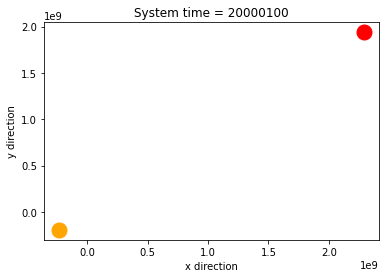

[-0.0002793  -0.00023667]
[-677.44709131  799.41980946]
----------
[2.79302590e-05 2.36670799e-05]
[ 67.74470913 -79.94198095]
----------
xxxxxxxxxxxx


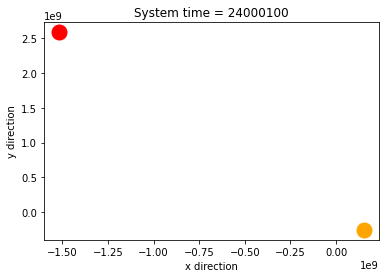

[ 0.000185   -0.00031595]
[-904.26110364 -529.50170827]
----------
[-1.84995200e-05  3.15952461e-05]
[90.42611036 52.95017083]
----------
xxxxxxxxxxxx


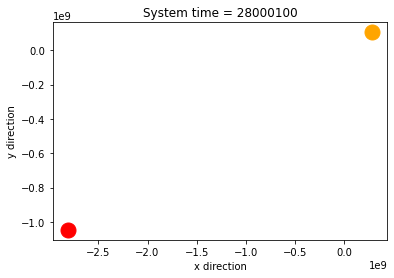

[0.00034313 0.0001278 ]
[ 365.79383217 -981.9922088 ]
----------
[-3.43134602e-05 -1.27804592e-05]
[-36.57938322  98.19922088]
----------
xxxxxxxxxxxx


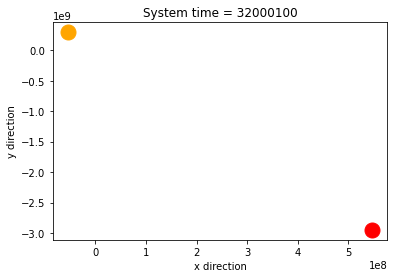

[-6.68168313e-05  3.60051493e-04]
[1030.33667831  191.24276458]
----------
[ 6.68168313e-06 -3.60051493e-05]
[-103.03366783  -19.12427646]
----------
xxxxxxxxxxxx


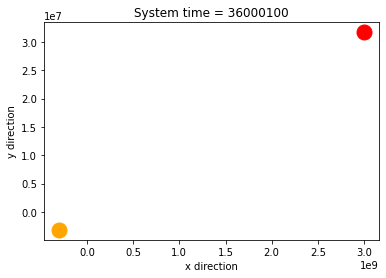

[-3.66214262e-04 -3.85841622e-06]
[ -11.07727063 1047.90190806]
----------
[3.66214262e-05 3.85841622e-07]
[   1.10772706 -104.79019081]
----------
xxxxxxxxxxxx


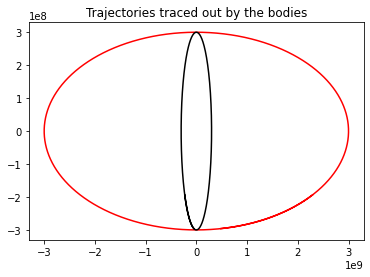

In [5]:
poslist_body1_x = []
poslist_body1_y = []
poslist_body2_x = []
poslist_body2_y = []

for i in range(200000):
    system.update()
    poslist_body1_x.append(system.bodies[0].pos[0])
    poslist_body1_y.append(system.bodies[0].pos[1])
    poslist_body2_x.append(system.bodies[1].pos[0])
    poslist_body2_y.append(system.bodies[1].pos[1])
    if i%40000 == 0:
        system.display()
        for bodies1 in system.bodies:
            print(bodies1.acc)
            print(bodies1.vel)
            print('----------')
        print('xxxxxxxxxxxx')

plt.figure()
plt.plot(poslist_body1_x, poslist_body2_y, color = 'r')
plt.plot(poslist_body2_x, poslist_body2_y, color = 'black')
plt.title("Trajectories traced out by the bodies")
plt.show()

In [6]:
#For displaying animations inside the jupyter notebook
%matplotlib notebook

def animate(i, system, lines):
#Run 200 update steps between each frame.
#Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].pos[0], system.bodies[i].pos[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif. In secs.
t_step = 1e3
system = System(bodies, tstep=t_step)


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].pos[0], bodies[i].pos[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 200)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count, interval = 1000/30, 
                              blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")
ani.save("OrbitSimulation.gif")
print("Done")

plt.show()

Progress:  150
Done


In [13]:
#stable 3-body orbit

scale = 1.79*(10**9)
pos = np.asarray((-0.97000436*scale, 0.24308753*scale))
m1 =  5.9742*10**24
v = 297.83
v_d = math.radians(42.843398292913164)

b1 = Body(pos = pos, mass = m1, vel = (v*np.cos(v_d), v*np.sin(v_d)), 
          color = 'r', size = 15)
b2 = Body(pos = -pos, mass = m1, vel = (v*np.cos(v_d), v*np.sin(v_d)), 
          color = 'g', size = 15)
b3 = Body(pos = (0,0), mass = m1, vel = (v*np.cos(v_d - np.pi), 
                                         v*np.sin(v_d - np.pi)), 
          color = 'b', size = 15)

bodies3sys = [b1, b2, b3]

system3body = System(bodies3sys, tstep = 10**3, scale = scale)

poslist_body1_x = []
poslist_body1_y = []
poslist_body2_x = []
poslist_body2_y = []
poslist_body3_x = []
poslist_body3_y = []

"""
for i in range(1000000):
    system3body.update()
    poslist_body1_x.append(system3body.bodies[0].pos[0])
    poslist_body1_y.append(system3body.bodies[0].pos[1])
    poslist_body2_x.append(system3body.bodies[1].pos[0])
    poslist_body2_y.append(system3body.bodies[1].pos[1])
    poslist_body3_x.append(system3body.bodies[2].pos[0])
    poslist_body3_y.append(system3body.bodies[2].pos[1])
    if i%100000 == 0:
        system3body.display()

plt.figure()
plt.plot(poslist_body1_x, poslist_body2_y, color = 'r')
plt.plot(poslist_body2_x, poslist_body2_y, color = 'black')
plt.plot(poslist_body3_x, poslist_body3_y, color = 'blue')
plt.show()
"""

"\nfor i in range(1000000):\n    system3body.update()\n    poslist_body1_x.append(system3body.bodies[0].pos[0])\n    poslist_body1_y.append(system3body.bodies[0].pos[1])\n    poslist_body2_x.append(system3body.bodies[1].pos[0])\n    poslist_body2_y.append(system3body.bodies[1].pos[1])\n    poslist_body3_x.append(system3body.bodies[2].pos[0])\n    poslist_body3_y.append(system3body.bodies[2].pos[1])\n    if i%100000 == 0:\n        system3body.display()\n\nplt.figure()\nplt.plot(poslist_body1_x, poslist_body2_y, color = 'r')\nplt.plot(poslist_body2_x, poslist_body2_y, color = 'black')\nplt.plot(poslist_body3_x, poslist_body3_y, color = 'blue')\nplt.show()\n"

In [14]:
system3body.display()

<IPython.core.display.Javascript object>

In [10]:
%matplotlib notebook

system3body = System(bodies3sys, tstep = 10**3, scale = scale)

#Create figure
lines = [None] * len(bodies3sys)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies3sys)):
    lines[i], = ax.plot(bodies3sys[i].pos[0], bodies3sys[i].pos[1], 
          marker = 'o', color = bodies3sys[i].color, ms = bodies3sys[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 200)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count, interval = 1000/30, 
                              blit = True, fargs = [system3body, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")
ani.save("OrbitSimulation3body.gif")
print("Done")

plt.show()

Progress:  150
Done


As for the conservation of energy, we know that Euler's method overshoots or undershoots and hence, the energy will not be conserved. There will be new energy added to the system over time. Similarly with radii, because the forward Euler method undershoots the answer, the radii will keep expanding.